# Proyek Analisis Data: E-Commerce Public Dataset
- **Nama:** Syifa Azzahirah
- **Email:** azzahirahsyifa1@gmail.com
- **ID Dicoding:** syifaazhh

## 1. Menentukan Pertanyaan Bisnis

1. Produk dan Penjualan:
- P1: Apa kategori produk terpopuler berdasarkan jumlah pesanan?
- P2: Bagaimana pola pembelian harian, mingguan, atau bulanan? Apakah ada waktu tertentu dengan volume penjualan yang tinggi?
- P3: Apa produk yang memiliki total pendapatan tertinggi?
2. Pelanggan:
- P4: Dari daerah mana pelanggan terbanyak berasal?
- P5: Apa rasio pelanggan baru dan pelanggan yang sudah pernah membeli sebelumnya?
3. Pembayaran:
- P6: Metode pembayaran apa yang paling sering digunakan?
- P7: Apakah terdapat hubungan antara jenis pembayaran dan waktu pengiriman?
4. Ulasan dan Kepuasan Pelanggan:
- P8: Bagaimana distribusi rating ulasan pelanggan? Apakah mayoritas ulasan bernada positif atau negatif?
- P9: Apakah ada perbedaan waktu pengiriman antara pesanan yang diberi ulasan positif dan negatif?
5. Pengiriman:
- P10: Berapa rata-rata waktu pengiriman berdasarkan kategori produk?
- P11: Apakah terdapat keterlambatan pengiriman yang sering terjadi pada kategori produk tertentu?

## 2. Import Semua Packages/Library yang Digunakan

In [1]:
# Import library yang diperlukan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Configure plot style
sns.set(style="whitegrid")

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 3. Data Wrangling

### 3. 1. Gathering Data

####3. 1. 1. Orders Dataset

In [3]:
orders_df = pd.read_csv('/content/drive/My Drive/orders_dataset.csv')
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


####3. 1. 2. Products Dataset

In [4]:
products_df = pd.read_csv('/content/drive/My Drive/products_dataset.csv')
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


####3. 1. 3. Order Items Dataset

In [5]:
order_items_df = pd.read_csv('/content/drive/My Drive/order_items_dataset.csv')
order_items_df.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


####3. 1. 4. Order Payments Dataset

In [6]:
order_payments_df = pd.read_csv('/content/drive/My Drive/order_payments_dataset.csv')
order_payments_df.head()

,order_id,payment_sequential,payment_type,payment_installments,payment_value
0,b81ef226f3fe1789b1e8b2acac839d17,1,credit_card,8,99.33
1,a9810da82917af2d9aefd1278f1dcfa0,1,credit_card,1,24.39
2,25e8ea4e93396b6fa0d3dd708e76c1bd,1,credit_card,1,65.71
3,ba78997921bbcdc1373bb41e913ab953,1,credit_card,8,107.78
4,42fdf880ba16b47b59251dd489d4441a,1,credit_card,2,128.45


####3. 1. 5. Order Reviews Dataset

In [7]:
order_reviews_df = pd.read_csv('/content/drive/My Drive/order_reviews_dataset.csv')
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


####3. 1. 6. Customers Dataset

In [8]:
customers_df = pd.read_csv('/content/drive/My Drive/customers_dataset.csv')
customers_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


####3. 1. 7. Geolocation Dataset

In [9]:
geolocation_df = pd.read_csv('/content/drive/My Drive/geolocation_dataset.csv')
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


####3. 1. 8. Product Category Name Translation Dataset (in English)

In [10]:
product_category_name_translations_df = pd.read_csv('/content/drive/My Drive/product_category_name_translation.csv')
product_category_name_translations_df.head()

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor


####3. 1. 9. Sellers Dataset

In [11]:
sellers_df = pd.read_csv('/content/drive/My Drive/sellers_dataset.csv')
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


**Insight:**

Telah dilakukan proses Data Gathering pada Olist E-Commerce Dataset

###3. 2. Assessing Data

####3. 2. 1. Orders Dataset

In [12]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [13]:
orders_df.isna().sum()

,0
order_id,0
customer_id,0
order_status,0
order_purchase_timestamp,0
order_approved_at,160
order_delivered_carrier_date,1783
order_delivered_customer_date,2965
order_estimated_delivery_date,0


In [14]:
orders_df.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-05-08 23:38:46,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


####3. 2. 2. Products Dataset

In [15]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [16]:
customers_df.duplicated().sum()

0

In [17]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


####3. 2. 3. Order Items Dataset

In [18]:
order_items_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


In [19]:
order_items_df.duplicated().sum()

0

In [20]:
order_items_df.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


####3. 2. 4. Order Payments Dataset

In [21]:
order_payments_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [22]:
order_payments_df.duplicated().sum()

0

In [23]:
order_payments_df.describe()

,payment_sequential,payment_installments,payment_value
count,103886.000000,103886.000000,103886.000000
mean,1.092679,2.853349,154.100380
std,0.706584,2.687051,217.494064
min,1.000000,0.000000,0.000000
25%,1.000000,1.000000,56.790000
50%,1.000000,1.000000,100.000000
75%,1.000000,4.000000,171.837500
max,29.000000,24.000000,13664.080000


####3. 2. 5. Order Reviews Dataset

In [24]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_comment_title     11568 non-null  object
 4   review_comment_message   40977 non-null  object
 5   review_creation_date     99224 non-null  object
 6   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(6)
memory usage: 5.3+ MB


In [25]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_comment_title,87656
review_comment_message,58247
review_creation_date,0
review_answer_timestamp,0


In [26]:
order_reviews_df.duplicated().sum()

0

In [27]:
order_reviews_df.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


####3. 2. 6. Customers Dataset

In [28]:
customers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [29]:
customers_df.duplicated().sum()

0

In [30]:
customers_df.describe()

,customer_zip_code_prefix
count,99441.000000
mean,35137.474583
std,29797.938996
min,1003.000000
25%,11347.000000
50%,24416.000000
75%,58900.000000
max,99990.000000


####3. 2. 7. Geolocation Dataset

In [31]:
geolocation_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000163 entries, 0 to 1000162
Data columns (total 5 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   geolocation_zip_code_prefix  1000163 non-null  int64  
 1   geolocation_lat              1000163 non-null  float64
 2   geolocation_lng              1000163 non-null  float64
 3   geolocation_city             1000163 non-null  object 
 4   geolocation_state            1000163 non-null  object 
dtypes: float64(2), int64(1), object(2)
memory usage: 38.2+ MB


In [32]:
geolocation_df.duplicated().sum()

261831

In [33]:
geolocation_df.describe()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng
count,1.000163e+06,1.000163e+06,1.000163e+06
mean,3.657417e+04,-2.117615e+01,-4.639054e+01
std,3.054934e+04,5.715866e+00,4.269748e+00
min,1.001000e+03,-3.660537e+01,-1.014668e+02
25%,1.107500e+04,-2.360355e+01,-4.857317e+01
50%,2.653000e+04,-2.291938e+01,-4.663788e+01
75%,6.350400e+04,-1.997962e+01,-4.376771e+01
max,9.999000e+04,4.506593e+01,1.211054e+02


####3. 2. 8. Product Category Name Translation Dataset (in English)

In [34]:
product_category_name_translations_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB


In [35]:
product_category_name_translations_df.duplicated().sum()

0

In [36]:
product_category_name_translations_df.describe()

,product_category_name,product_category_name_english
count,71,71
unique,71,71
top,beleza_saude,health_beauty
freq,1,1


####3. 2. 9. Sellers Dataset

In [37]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [38]:
sellers_df.duplicated().sum()

0

In [39]:
sellers_df.describe()

,seller_zip_code_prefix
count,3095.000000
mean,32291.059451
std,32713.453830
min,1001.000000
25%,7093.500000
50%,14940.000000
75%,64552.500000
max,99730.000000


**Insight:**
1. **Orders Dataset**
- Kolom *order_approved_at* memiliki 160 nilai yang hilang.
- Kolom *order_delivered_carrier_date* memiliki 1783 nilai yang hilang
- Kolom *order_delivered_customer_date* memiliki 2965 nilai yang hilang
- Tipe data di kolom *order_purchase_timestamp*, *order_approved_at*, *order_delivered_carrier_date*, *order_delivered_customer_date*, dan *order_estimated_delivery_date* tidak sesuai (wrong data type).
2. **Products Dataset**
- Hanya kolom *product_id* yang tidak memiliki nilai yang hilang, kolom lainnya mengandung missing values.
3. **Order Items Dataset**
- Tidak ada catatan atau missing values.
4. **Order Payments Dataset**
- Tidak ada catatan atau missing values.
5. **Order Reviews Dataset**
- Kolom *review_comment_title* memiliki 87,656 nilai yang hilang.
- Kolom *review_comment_message* memiliki 58,247 nilai yang hilang.
- Tipe data di kolom *review_creation_date* dan *review_answer_timestamp* tidak sesuai (wrong data type).
6. **Customers Dataset**
- Tidak ada catatan atau missing values.
7. **Geolocation Dataset**
- Terdapat 261,831 record yang duplikat.
8. **Product Category Name Translation Dataset (in English)**
- Tidak ada catatan atau missing values.
9. **Sellers Dataset**
- Tidak ada catatan atau missing values.

###3. 3. Cleaning Data

####3. 3. 1. Orders Dataset

In [40]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [41]:
orders_df.dropna(subset=["order_approved_at", "order_delivered_carrier_date", "order_delivered_customer_date"], inplace=True)

In [42]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       96461 non-null  object
 1   customer_id                    96461 non-null  object
 2   order_status                   96461 non-null  object
 3   order_purchase_timestamp       96461 non-null  object
 4   order_approved_at              96461 non-null  object
 5   order_delivered_carrier_date   96461 non-null  object
 6   order_delivered_customer_date  96461 non-null  object
 7   order_estimated_delivery_date  96461 non-null  object
dtypes: object(8)
memory usage: 6.6+ MB


#####Correct the columns with the right datatype

In [43]:
datetime_columns = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for column in datetime_columns:
    orders_df[column] = pd.to_datetime(orders_df[column])

In [44]:
orders_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 96461 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       96461 non-null  object        
 1   customer_id                    96461 non-null  object        
 2   order_status                   96461 non-null  object        
 3   order_purchase_timestamp       96461 non-null  datetime64[ns]
 4   order_approved_at              96461 non-null  datetime64[ns]
 5   order_delivered_carrier_date   96461 non-null  datetime64[ns]
 6   order_delivered_customer_date  96461 non-null  datetime64[ns]
 7   order_estimated_delivery_date  96461 non-null  datetime64[ns]
dtypes: datetime64[ns](5), object(3)
memory usage: 6.6+ MB


####3. 3. 2. Products Dataset

In [45]:
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


In [46]:
products_df = products_df[['product_id', 'product_category_name']]
products_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   product_id             32951 non-null  object
 1   product_category_name  32341 non-null  object
dtypes: object(2)
memory usage: 515.0+ KB


In [47]:
products_df.isna().sum()

,0
product_id,0
product_category_name,610


In [48]:
products_df["product_category_name"].fillna("outros", inplace=True)
products_df.isna().sum()

<ipython-input-48-9d76475b9e6a>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products_df["product_category_name"].fillna("outros", inplace=True)


,0
product_id,0
product_category_name,0


####3. 3. 3. Order Reviews Dataset

In [49]:
order_reviews_df.drop(columns=["review_comment_title", "review_comment_message"], inplace=True)

In [50]:
order_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99224 entries, 0 to 99223
Data columns (total 5 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   review_id                99224 non-null  object
 1   order_id                 99224 non-null  object
 2   review_score             99224 non-null  int64 
 3   review_creation_date     99224 non-null  object
 4   review_answer_timestamp  99224 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [51]:
order_reviews_df.isna().sum()

,0
review_id,0
order_id,0
review_score,0
review_creation_date,0
review_answer_timestamp,0


In [52]:
datetime_columns = ['review_creation_date', 'review_answer_timestamp']

for column in datetime_columns:
    order_reviews_df[column] = pd.to_datetime(order_reviews_df[column])

In [53]:
order_reviews_df.dtypes

,0
review_id,object
order_id,object
review_score,int64
review_creation_date,datetime64[ns]
review_answer_timestamp,datetime64[ns]


**Insight:**

Proses pembersihan data telah dilakukan meliputi langkah-langkah berikut:
1. Menghapus Data Duplikat
2. Menghapus Baris dengan Nilai Kosong
3. Memperbaiki Tipe Data
4. Menghapus Kolom yang Tidak Digunakan
5. Mengisi Baris dengan Nilai Kosong

##4. Exploratory Data Analysis (EDA)

###4. 1. Explore Orders Dataset

####4. 1. 1. Orders Based On Years

In [54]:
orders_df['purchase_year'] = pd.DatetimeIndex(orders_df['order_purchase_timestamp']).year

In [55]:
orders_per_year = orders_df.groupby('purchase_year').size().reset_index(name='total_orders').sort_values('purchase_year')

orders_per_year

,purchase_year,total_orders
0,2016,272
1,2017,43411
2,2018,52778


####4. 1. 2. Orders Based On Months

In [56]:
orders_df['purchase_month'] = orders_df['order_purchase_timestamp'].dt.strftime('%B')

In [57]:
orders_per_month = (
    orders_df.groupby('purchase_month')
    .size()
    .reset_index(name='total_orders')
)

month_order = ["January", "February", "March", "April", "May", "June",
               "July", "August", "September", "October", "November", "December"]

orders_per_month['purchase_month'] = pd.Categorical(orders_per_month['purchase_month'], categories=month_order, ordered=True)
orders_per_month = orders_per_month.sort_values('purchase_month').reset_index(drop=True)

orders_per_month

,purchase_month,total_orders
0,January,7817
1,February,8197
2,March,9549
3,April,9101
4,May,10294
5,June,9231
6,July,10028
7,August,10544
8,September,4150
9,October,4748


####4. 1. 3. Order Based On State

In [58]:
merged_order_customer_df = pd.merge(
    orders_df,
    customers_df,
    on='customer_id',
    how='left'
)

In [59]:
orders_by_state = (
    merged_order_customer_df.groupby('customer_state')
    .size()
    .reset_index(name='total_orders')
    .rename(columns={'customer_state': 'state'})
)

orders_by_state

,state,total_orders
0,AC,80
1,AL,397
2,AM,145
3,AP,67
4,BA,3256
5,CE,1278
6,DF,2080
7,ES,1995
8,GO,1957
9,MA,716


###4. 2. Explore Products Dataset

####Combine the products dataset with translated product category name

In [60]:
products_df

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas
...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios


In [61]:
product_category_name_translations_df

,product_category_name,product_category_name_english
0,beleza_saude,health_beauty
1,informatica_acessorios,computers_accessories
2,automotivo,auto
3,cama_mesa_banho,bed_bath_table
4,moveis_decoracao,furniture_decor
...,...,...
66,flores,flowers
67,artes_e_artesanato,arts_and_craftmanship
68,fraldas_higiene,diapers_and_hygiene
69,fashion_roupa_infanto_juvenil,fashion_childrens_clothes


In [62]:
product_category_merged_df = products_df.merge(
    product_category_name_translations_df,
    how='left',
    left_on='product_category_name',
    right_on='product_category_name'
)

product_category_merged_df

,product_id,product_category_name,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,housewares
...,...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,moveis_decoracao,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construcao_ferramentas_iluminacao,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,cama_mesa_banho,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,informatica_acessorios,computers_accessories


In [63]:
product_category_merged_df.drop(columns='product_category_name', inplace=True)

product_category_merged_df

,product_id,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares
...,...,...
32946,a0b7d5a992ccda646f2d34e418fff5a0,furniture_decor
32947,bf4538d88321d0fd4412a93c974510e6,construction_tools_lights
32948,9a7c6041fa9592d9d9ef6cfe62a71f8c,bed_bath_table
32949,83808703fc0706a22e264b9d75f04a2e,computers_accessories


###4. 3. Explore Order Items Dataset

In [64]:
order_items_df.groupby(by='order_item_id').agg({
    'order_id': 'nunique'
})

,order_id
order_item_id,
1,98666
2,9803
3,2287
4,965
5,460
6,256
7,58
8,36
9,28


In [65]:
merged_order_items_products_df = order_items_df.merge(
    product_category_merged_df,
    how='left',
    on='product_id'
)

merged_order_items_products_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,computers_accessories


In [66]:
order_product_category_df = merged_order_items_products_df[['order_id', 'product_category_name_english']].groupby(by='product_category_name_english').agg({
    'order_id': 'count'
}).reset_index()

order_product_category_df.rename(columns={'order_id': 'total_order'}, inplace=True)

order_product_category_df

,product_category_name_english,total_order
0,agro_industry_and_commerce,212
1,air_conditioning,297
2,art,209
3,arts_and_craftmanship,24
4,audio,364
...,...,...
66,stationery,2517
67,tablets_printing_image,83
68,telephony,4545
69,toys,4117


###4. 4. Explore Order Reviews Dataset

In [67]:
order_reviews_df

,review_id,order_id,review_score,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,2018-01-18,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,2018-03-10,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,2018-02-17,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,2017-04-21,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,2018-03-01,2018-03-02 10:26:53
...,...,...,...,...,...
99219,574ed12dd733e5fa530cfd4bbf39d7c9,2a8c23fee101d4d5662fa670396eb8da,5,2018-07-07,2018-07-14 17:18:30
99220,f3897127253a9592a73be9bdfdf4ed7a,22ec9f0669f784db00fa86d035cf8602,5,2017-12-09,2017-12-11 20:06:42
99221,b3de70c89b1510c4cd3d0649fd302472,55d4004744368f5571d1f590031933e4,5,2018-03-22,2018-03-23 09:10:43
99222,1adeb9d84d72fe4e337617733eb85149,7725825d039fc1f0ceb7635e3f7d9206,4,2018-07-01,2018-07-02 12:59:13


In [68]:
review_counts_df = (
    order_reviews_df.groupby('review_score')
    .size()
    .reset_index(name='total_reviews')
)

review_counts_df

,review_score,total_reviews
0,1,11424
1,2,3151
2,3,8179
3,4,19142
4,5,57328


###4. 5. Explore Customers Dataset

In [69]:
customer_status_df = customers_df[['customer_id']].copy()
customer_status_df['status'] = customer_status_df['customer_id'].isin(orders_df['customer_id']).replace({True: 'Active', False: 'Inactive'})

customer_status_df.head()

,customer_id,status
0,06b8999e2fba1a1fbc88172c00ba8bc7,Active
1,18955e83d337fd6b2def6b18a428ac77,Active
2,4e7b3e00288586ebd08712fdd0374a03,Active
3,b2b6027bc5c5109e529d4dc6358b12c3,Active
4,4f2d8ab171c80ec8364f7c12e35b23ad,Active


In [70]:
customer_status_df = customer_status_df.groupby(by='status').agg({
    'customer_id': 'count'
}).reset_index()

customer_status_df.rename(columns={
    'customer_id': 'total_customer'
}, inplace=True)

customer_status_df

,status,total_customer
0,Active,96461
1,Inactive,2980


**Insight:**

Analisis Data Eksploratif telah menghasilkan beberapa DataFrame yang akan dimanfaatkan dalam proses Visualisasi & Analisis Eksplanatori:

1. *orders_per_year_df*
2. *orders_per_month_df*
3. *orders_by_state*
4. *product_category_merged_df*
5. *order_product_category_df*
6. *review_counts_df*
7. *customer_status_df*

##5. Visualization & Explanatory Analysis

###1. Produk dan Penjualan

####P1: Apa kategori produk terpopuler berdasarkan jumlah pesanan?

In [71]:
order_product_category_df.sort_values(by='total_order', ascending=False).head(10)

,product_category_name_english,total_order
7,bed_bath_table,11115
43,health_beauty,9670
65,sports_leisure,8641
39,furniture_decor,8334
15,computers_accessories,7827
49,housewares,6964
70,watches_gifts,5991
68,telephony,4545
42,garden_tools,4347
5,auto,4235


<ipython-input-79-5b4f529d424d>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


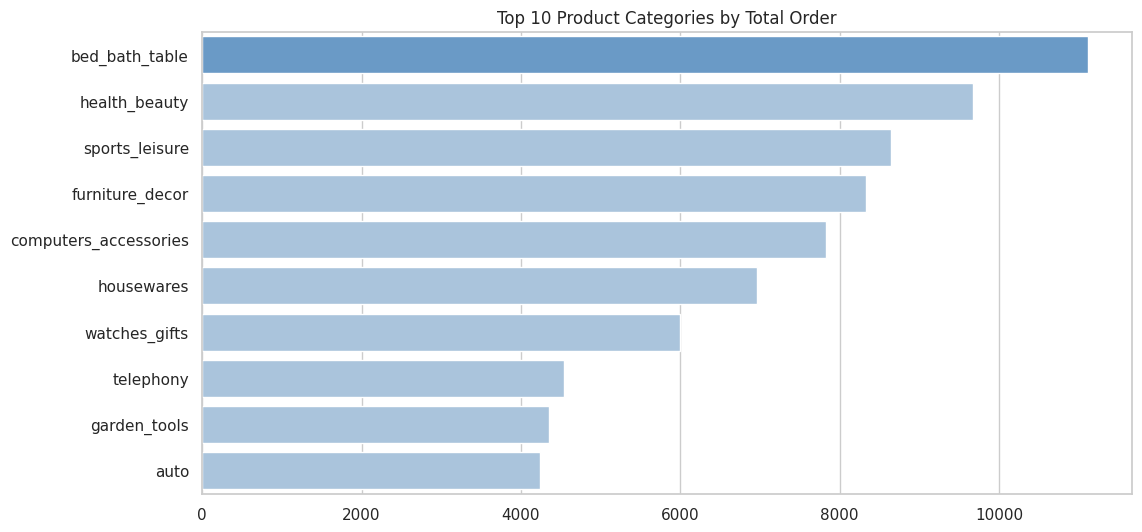

In [79]:
import matplotlib.pyplot as plt
import seaborn as sns

# P1 Visualization: Top 10 Product Categories by Order Count
top_10_df = order_product_category_df.sort_values(by='total_order', ascending=False).head(10)

# Menandai kategori dengan total_order tertinggi
top_color = ['#A2C4E4' if i != top_10_df['total_order'].idxmax() else '#5B9BD5' for i in top_10_df.index]

plt.figure(figsize=(12, 6))
sns.barplot(
    y='product_category_name_english',
    x='total_order',
    data=top_10_df,
    palette=top_color
)
plt.title('Top 10 Product Categories by Total Order')
plt.xlabel('')
plt.ylabel('')
plt.show()

####P2: Bagaimana pola pembelian harian, mingguan, atau bulanan? Apakah ada waktu tertentu dengan volume penjualan yang tinggi?

#####1. Yearly Order Trend

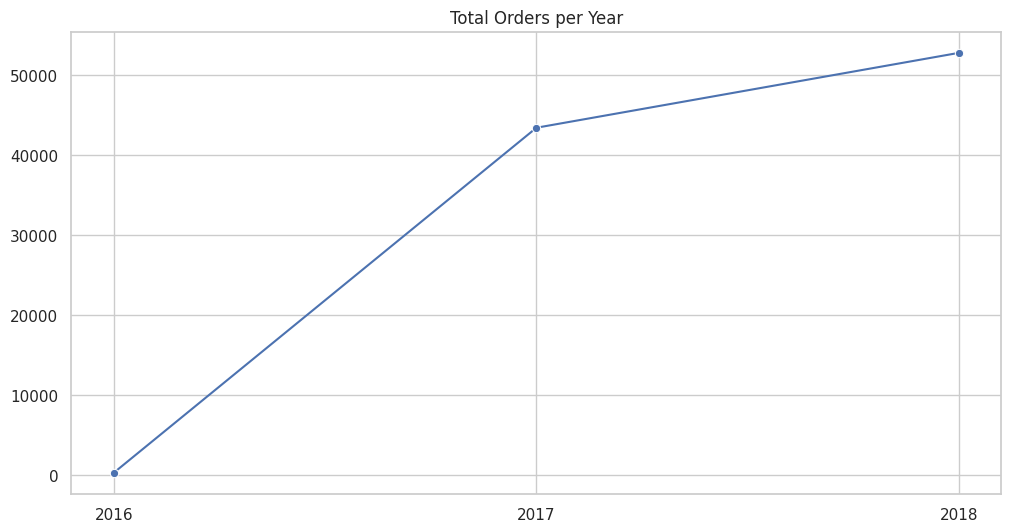

In [81]:
# P2 Visualization: Sales Trend Over Time (Yearly)
plt.figure(figsize=(12, 6))
sns.lineplot(x='purchase_year', y='total_orders', data=orders_per_year, marker='o')
plt.title('Total Orders per Year')
plt.xlabel('')
plt.ylabel('')
plt.xticks(range(2016, 2019)) # This line sets the x-axis ticks to 2016, 2017, and 2018
plt.show()

#####2. Monthly Order Trend

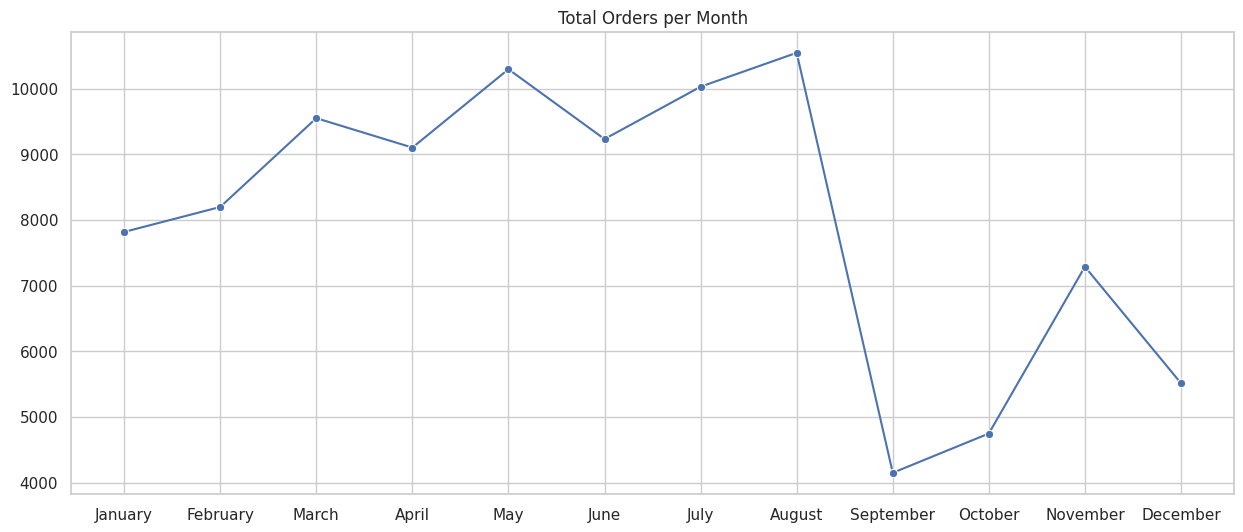

In [82]:
# P2 Visualization: Sales Trend Over Time (Monthly)
plt.figure(figsize=(15, 6))
sns.lineplot(x='purchase_month', y='total_orders', data=orders_per_month, marker='o')
plt.title('Total Orders per Month')
plt.xlabel('')
plt.ylabel('')
plt.show()

####P3: Apa produk yang memiliki total pendapatan tertinggi?

<ipython-input-84-a36231ebd469>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='total_revenue', y='product_category_name_english', data=revenue_per_category.head(10), palette=colors)
<ipython-input-84-a36231ebd469>:15: UserWarning: The palette list has more values (71) than needed (10), which may not be intended.
  sns.barplot(x='total_revenue', y='product_category_name_english', data=revenue_per_category.head(10), palette=colors)


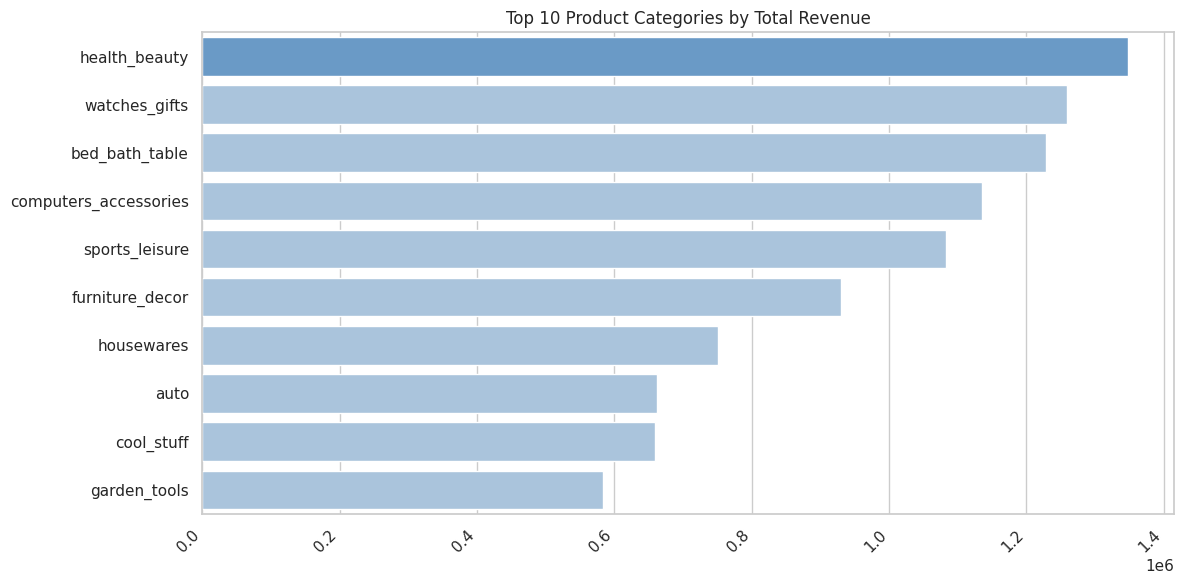

In [84]:
# Calculate total revenue per product category
merged_df = pd.merge(order_items_df, products_df, on='product_id', how='left')
merged_df = pd.merge(merged_df, product_category_name_translations_df, on='product_category_name', how='left')
merged_df['total_revenue'] = merged_df['price'] * merged_df['order_item_id']
revenue_per_category = merged_df.groupby('product_category_name_english')['total_revenue'].sum().reset_index()
revenue_per_category = revenue_per_category.sort_values(by='total_revenue', ascending=False)


# Visualization
plt.figure(figsize=(12, 6))

# Define custom color palette
colors = ['#5B9BD5' if i == revenue_per_category['total_revenue'].idxmax() else '#A2C4E4' for i in revenue_per_category.index]

sns.barplot(x='total_revenue', y='product_category_name_english', data=revenue_per_category.head(10), palette=colors)
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Product Categories by Total Revenue')
plt.xlabel('')
plt.ylabel('')
plt.tight_layout()
plt.show()

###2. Pelanggan

####P4. Dari daerah mana pelanggan terbanyak berasal?

<ipython-input-85-0e57ea7d43c9>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


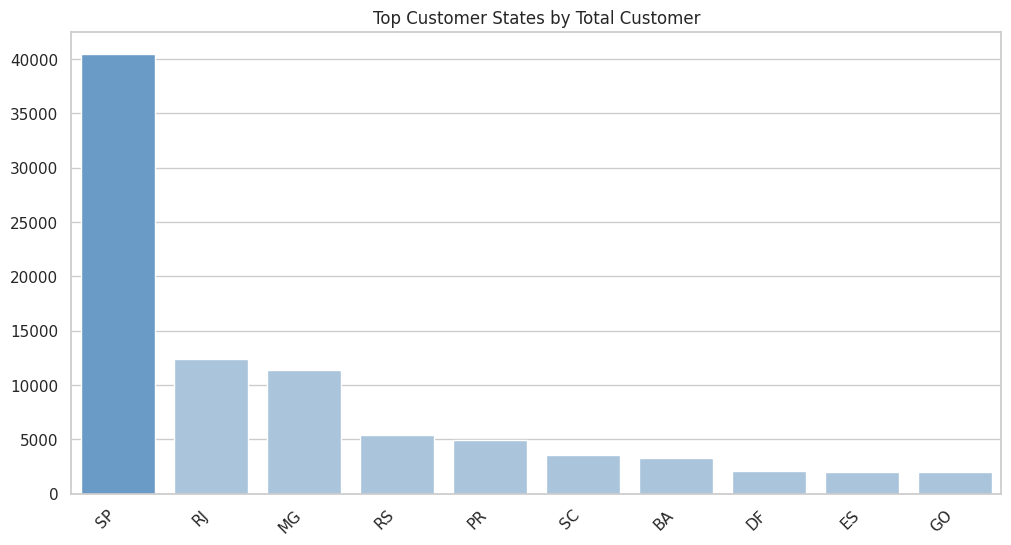

In [85]:
# P4 Visualization: Top 10 Customer States by Customer Count
top_10_customers = merged_order_customer_df.groupby('customer_state')['customer_id'].nunique().sort_values(ascending=False).head(10).reset_index()
top_10_customers.rename(columns={'customer_id': 'total_customer'}, inplace=True)

# Menandai state dengan total_customer tertinggi
top_color = ['#A2C4E4' if i != top_10_customers['total_customer'].idxmax() else '#5B9BD5' for i in top_10_customers.index]


plt.figure(figsize=(12, 6))
sns.barplot(
    x='customer_state',
    y='total_customer',
    data=top_10_customers,
    palette=top_color
)
plt.xticks(rotation=45, ha='right')
plt.title('Top Customer States by Total Customer')
plt.xlabel('')
plt.ylabel('')
plt.show()

####P5: Apa rasio pelanggan baru dan pelanggan yang sudah pernah membeli sebelumnya?

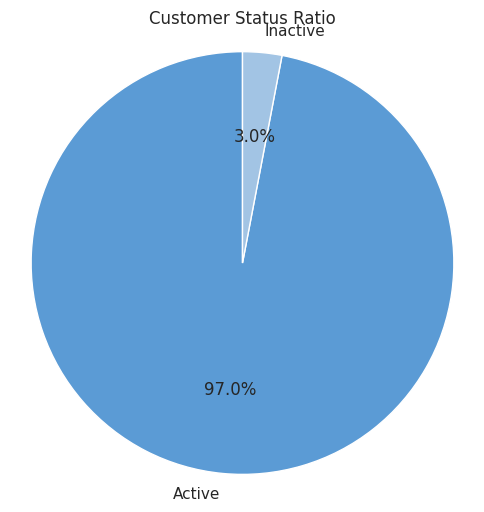

In [86]:
# P5 Visualization: Customer Status Ratio
plt.figure(figsize=(6, 6))
plt.pie(customer_status_df['total_customer'], labels=customer_status_df['status'], autopct='%1.1f%%', startangle=90, colors=['#5B9BD5', '#A2C4E4'])
plt.title('Customer Status Ratio')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

###3. Pembayaran

####P6: Metode pembayaran apa yang paling sering digunakan?

<ipython-input-87-0fc6ca66c630>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette=colors)


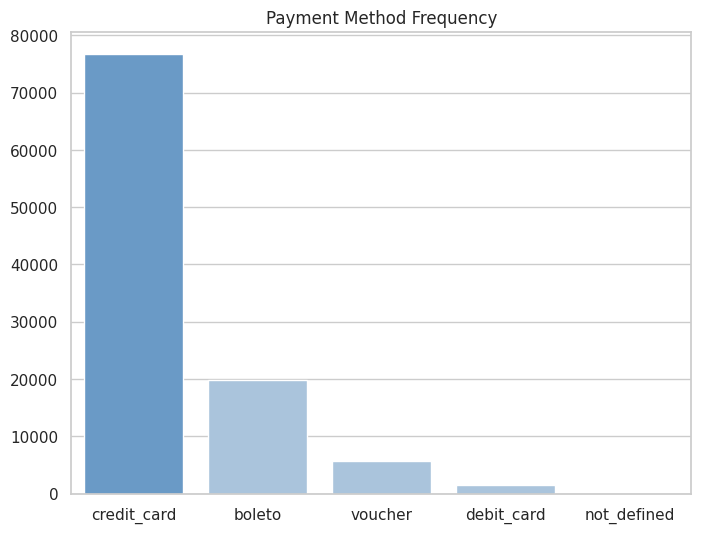

In [87]:
# P6 Visualization: Most Frequent Payment Method
payment_method_counts = order_payments_df['payment_type'].value_counts()

# Mencari nilai maksimum dalam payment_method_counts dan set color
max_value = payment_method_counts.max()
colors = ['#A2C4E4' if count != max_value else '#5B9BD5' for count in payment_method_counts.values]


plt.figure(figsize=(8, 6))
sns.barplot(x=payment_method_counts.index, y=payment_method_counts.values, palette=colors)
plt.title('Payment Method Frequency')
plt.xlabel('')
plt.ylabel('')
plt.show()

####P7: Apakah terdapat hubungan antara jenis pembayaran dan waktu pengiriman?

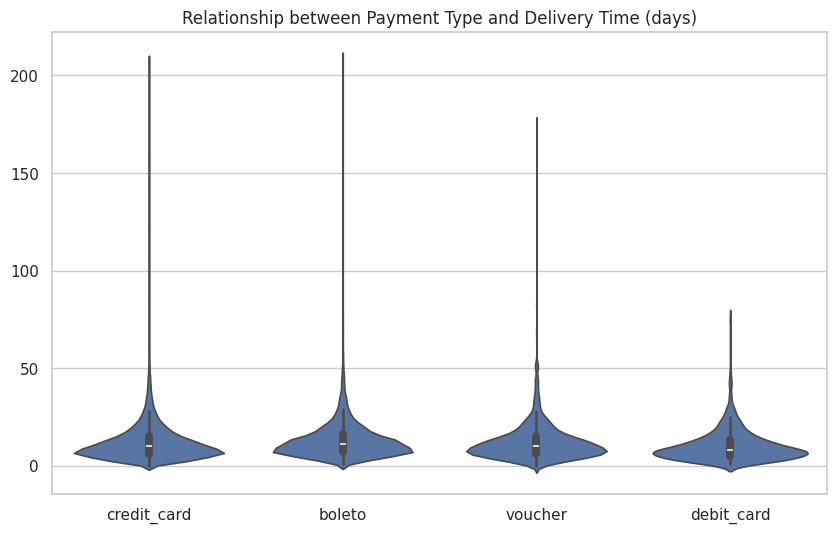

In [88]:
# Gabungkan data order_payments dan orders
merged_payment_delivery = pd.merge(order_payments_df, orders_df, on='order_id', how='inner')

# Hitung selisih waktu pengiriman
merged_payment_delivery['delivery_time'] = (merged_payment_delivery['order_delivered_customer_date'] - merged_payment_delivery['order_purchase_timestamp']).dt.days

# Buat violin diagram
plt.figure(figsize=(10, 6))
sns.violinplot(x='payment_type', y='delivery_time', data=merged_payment_delivery)
plt.title('Relationship between Payment Type and Delivery Time (days)')
plt.xlabel('')
plt.ylabel('')
plt.show()

###4. Ulasan dan Kepuasan Pelanggan

####P8: Bagaimana distribusi rating ulasan pelanggan? Apakah mayoritas ulasan bernada positif atau negatif?

<ipython-input-89-e56d475d73b3>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='review_score', data=order_reviews_df, palette="Blues") # Use the Blues palette


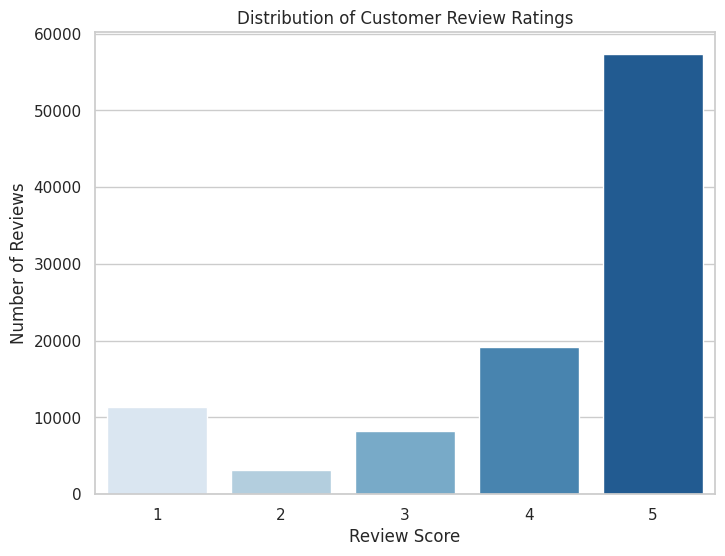

In [89]:
# P8 Visualization: Distribution of Customer Review Ratings
plt.figure(figsize=(8, 6))
sns.countplot(x='review_score', data=order_reviews_df, palette="Blues") # Use the Blues palette
plt.title('Distribution of Customer Review Ratings')
plt.xlabel('Review Score')
plt.ylabel('Number of Reviews')
plt.show()

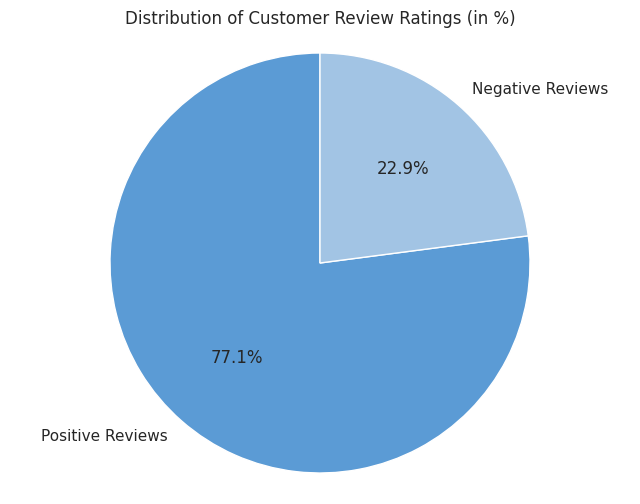

In [90]:
# Calculate positive and negative review percentages
positive_reviews = order_reviews_df[order_reviews_df['review_score'] >= 4]
negative_reviews = order_reviews_df[order_reviews_df['review_score'] < 4]

positive_percentage = (len(positive_reviews) / len(order_reviews_df)) * 100
negative_percentage = (len(negative_reviews) / len(order_reviews_df)) * 100

# Create the pie chart
labels = ['Positive Reviews', 'Negative Reviews']
sizes = [positive_percentage, negative_percentage]
colors = ['#5B9BD5', '#A2C4E4'] # Using the same color palette

plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distribution of Customer Review Ratings (in %)')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

####P9: Apakah ada perbedaan waktu pengiriman antara pesanan yang diberi ulasan positif dan negatif?

<ipython-input-91-38d09101c9f7>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='review_sentiment', y='delivery_time', data=average_delivery_time, palette=['#5B9BD5', '#A2C4E4'])


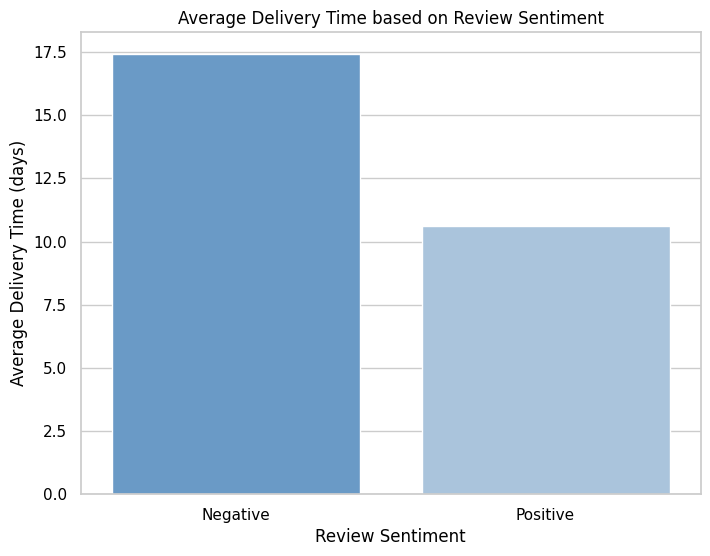

In [91]:
# Merge necessary DataFrames
merged_df = pd.merge(orders_df, order_reviews_df, on='order_id', how='inner')

# Calculate delivery time
merged_df['delivery_time'] = (merged_df['order_delivered_customer_date'] - merged_df['order_purchase_timestamp']).dt.days

# Define positive and negative reviews
merged_df['review_sentiment'] = merged_df['review_score'].apply(lambda x: 'Positive' if x >= 4 else 'Negative')

# Group data and calculate average delivery time for each review sentiment
average_delivery_time = merged_df.groupby('review_sentiment')['delivery_time'].mean().reset_index()

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x='review_sentiment', y='delivery_time', data=average_delivery_time, palette=['#5B9BD5', '#A2C4E4'])
plt.title('Average Delivery Time based on Review Sentiment', color='black')
plt.xlabel('Review Sentiment', color='black')
plt.ylabel('Average Delivery Time (days)', color='black')
plt.xticks(color='black')
plt.yticks(color='black')
plt.show()

###5. Pengiriman

####P10: Berapa rata-rata waktu pengiriman berdasarkan kategori produk?

#####1. Top 5 Product Categories by Longest Average Delivery Time

<ipython-input-93-6fa35909e779>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='delivery_time', y='product_category_name_english', data=top_5_categories, palette=colors)


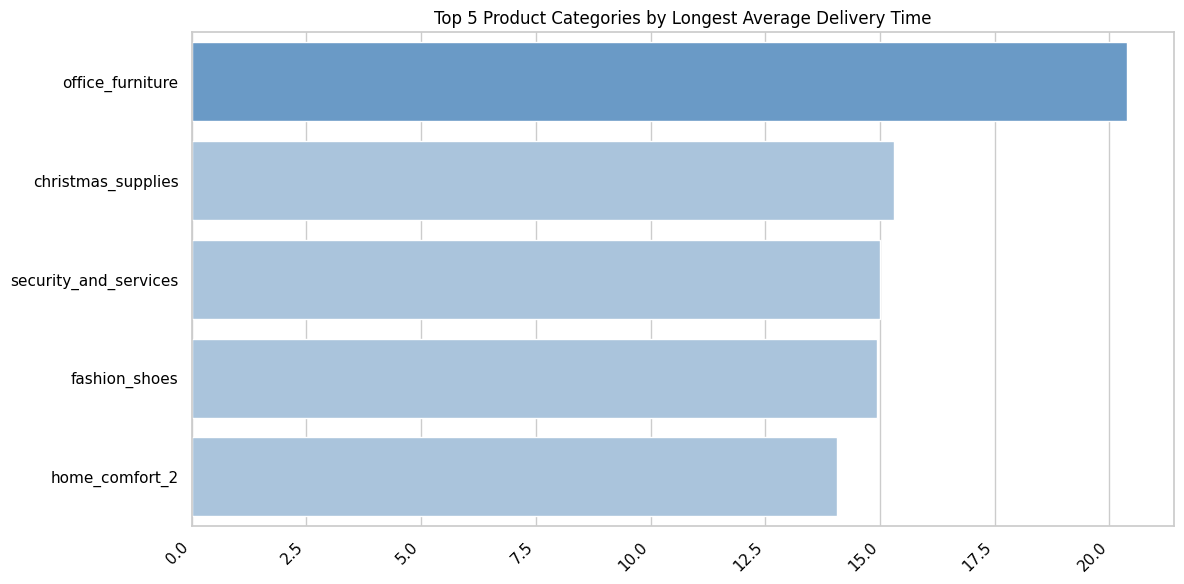

In [93]:
# Merge necessary DataFrames
merged_df = pd.merge(orders_df, order_items_df, on='order_id', how='inner')
merged_df = pd.merge(merged_df, products_df, on='product_id', how='inner')
merged_df = pd.merge(merged_df, product_category_name_translations_df, on='product_category_name', how='inner')

# Calculate delivery time
merged_df['delivery_time'] = (merged_df['order_delivered_customer_date'] - merged_df['order_purchase_timestamp']).dt.days

# Group data and calculate average delivery time for each product category
average_delivery_time_by_category = merged_df.groupby('product_category_name_english')['delivery_time'].mean().reset_index()

# Sort by average delivery time in descending order and get the top 5
top_5_categories = average_delivery_time_by_category.sort_values(by='delivery_time', ascending=False).head(5)

# Define custom color palette
colors = ['#5B9BD5' if i == top_5_categories['delivery_time'].idxmax() else '#A2C4E4' for i in top_5_categories.index]

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='delivery_time', y='product_category_name_english', data=top_5_categories, palette=colors)
plt.title('Top 5 Product Categories by Longest Average Delivery Time', color='black')
plt.xlabel('', color='black')
plt.ylabel('', color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.tight_layout()
plt.show()

#####2. Top 5 Product Categories By Fastest Average Delivery Time

<ipython-input-95-eec621687228>:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='delivery_time', y='product_category_name_english', data=top_5_categories, palette=colors)


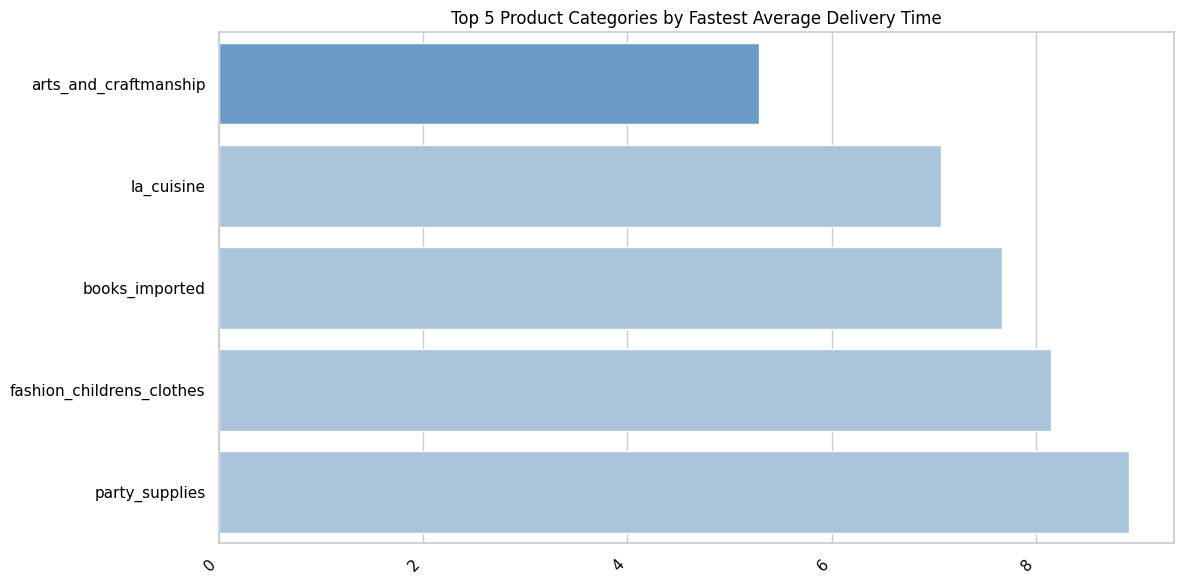

In [95]:
# Calculate delivery time
merged_df['delivery_time'] = (merged_df['order_delivered_customer_date'] - merged_df['order_purchase_timestamp']).dt.days

# Group data and calculate average delivery time for each product category
average_delivery_time_by_category = merged_df.groupby('product_category_name_english')['delivery_time'].mean().reset_index()

# Sort by average delivery time in ascending order and get the top 5
top_5_categories = average_delivery_time_by_category.sort_values(by='delivery_time', ascending=True).head(5)

# Define custom color palette
colors = ['#5B9BD5' if i == top_5_categories['delivery_time'].idxmin() else '#A2C4E4' for i in top_5_categories.index]

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='delivery_time', y='product_category_name_english', data=top_5_categories, palette=colors)
plt.title('Top 5 Product Categories by Fastest Average Delivery Time', color='black')
plt.xlabel('', color='black')
plt.ylabel('', color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.tight_layout()
plt.show()

####P11: Apakah terdapat keterlambatan pengiriman yang sering terjadi pada kategori produk tertentu?

<ipython-input-96-af1a876f54fb>:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='delay_percentage', y='product_category_name_english', data=top_10_delayed_categories, palette=colors)


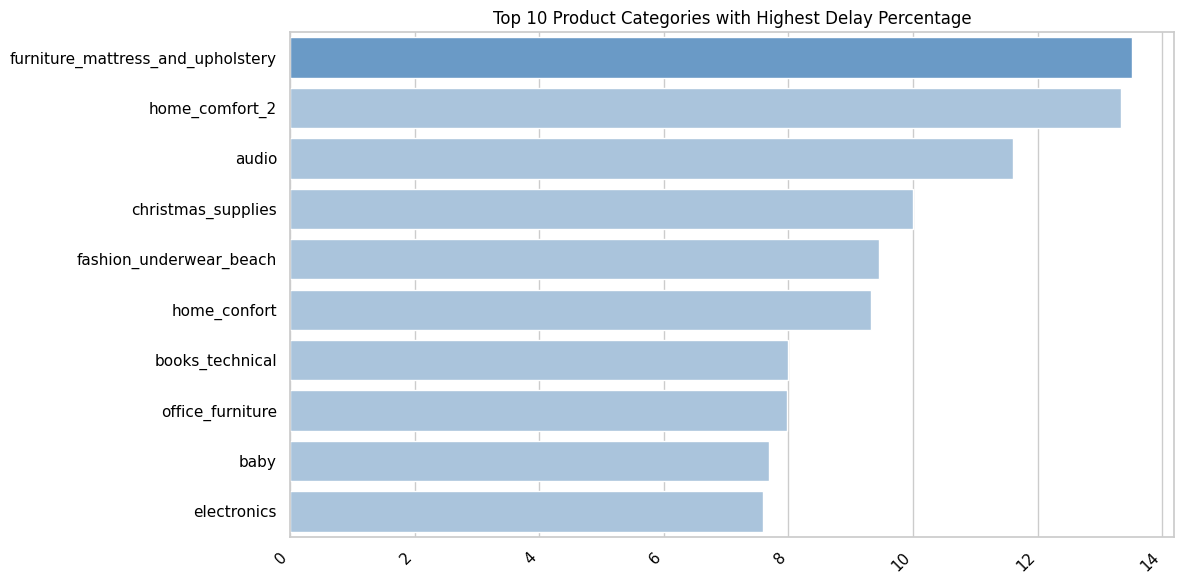

In [96]:
# Merge necessary DataFrames
merged_df = pd.merge(orders_df, order_items_df, on='order_id', how='inner')
merged_df = pd.merge(merged_df, products_df, on='product_id', how='inner')
merged_df = pd.merge(merged_df, product_category_name_translations_df, on='product_category_name', how='inner')

# Calculate delivery time difference
merged_df['delivery_time_diff'] = (merged_df['order_delivered_customer_date'] - merged_df['order_estimated_delivery_date']).dt.days

# Identify delayed deliveries
merged_df['is_delayed'] = merged_df['delivery_time_diff'] > 0

# Group by product category and calculate the percentage of delayed deliveries
delay_percentage_by_category = merged_df.groupby('product_category_name_english')['is_delayed'].mean() * 100
delay_percentage_by_category = delay_percentage_by_category.reset_index()
delay_percentage_by_category = delay_percentage_by_category.rename(columns={'is_delayed': 'delay_percentage'})

# Sort by delay percentage in descending order and get the top 10
top_10_delayed_categories = delay_percentage_by_category.sort_values(by='delay_percentage', ascending=False).head(10)

# Define custom color palette
colors = ['#5B9BD5' if i == top_10_delayed_categories['delay_percentage'].idxmax() else '#A2C4E4' for i in top_10_delayed_categories.index]

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='delay_percentage', y='product_category_name_english', data=top_10_delayed_categories, palette=colors)
plt.title('Top 10 Product Categories with Highest Delay Percentage', color='black')
plt.xlabel('', color='black')
plt.ylabel('', color='black')
plt.xticks(rotation=45, ha='right', color='black')
plt.yticks(color='black')
plt.tight_layout()
plt.show()

**Insight:**

1. *bed_bath_table* memiliki jumlah pesanan tertinggi, diikuti oleh *health_beauty* dan *sports_leisure*.  
2. Pesanan menunjukkan pertumbuhan yang signifikan dari tahun ke tahun (2016 hingga 2018).  
3. Bulan Agustus memiliki volume pesanan tertinggi, sementara bulan September menunjukkan penurunan tajam.  
4. *health_beauty* menghasilkan pendapatan tertinggi.  
5. SP (São Paulo) memiliki basis pelanggan terbesar.  
6. Mayoritas pelanggan (97%) adalah pelanggan aktif.  
7. *credit_card* adalah metode pembayaran yang paling populer.  
8. Waktu pengiriman serupa di semua metode pembayaran.  
9. Sebagian besar ulasan diberi nilai 5, menunjukkan kepuasan pelanggan yang tinggi.  
10. 77,1% ulasan bersifat positif, menandakan kepuasan pelanggan yang kuat.  
11. Ulasan negatif terkait dengan waktu pengiriman rata-rata yang jauh lebih lama (17,5 hari) dibandingkan dengan ulasan positif (sekitar 11 hari).  
12. *office_furniture* memiliki waktu pengiriman terlama (20 hari), diikuti oleh *christmas_supplies* dan *security_and_services*.  
13. Kategori seperti *arts_and_craftsmanship* (sekitar 5 hari) dan *la_cuisine* memiliki waktu pengiriman tercepat.  
14. *furniture_mattress_and_upholstery* dan *home_comfort_2* memiliki persentase keterlambatan tertinggi (sekitar 12–13%).  

## Recommendations

1. Memfokuskan pada kategori produk teratas dapat meningkatkan pendapatan.  
2. Memperluas strategi pemasaran dapat mempercepat tren pertumbuhan dari 2016-2018.  
3. Strategi promosi dapat diarahkan pada bulan-bulan dengan penurunan pesanan seperti September.  
4. Mengoptimalkan upaya pada kategori *health_beauty* dapat meningkatkan profitabilitas.  
5. Memperluas pasar ke negara bagian lain dengan jumlah pelanggan lebih rendah (contoh: RS, PR, SC) dapat meningkatkan pangsa pasar.  
6. Mempertahankan pelanggan aktif melalui program loyalitas atau inisiatif keterlibatan sangat penting.  
7. Menawarkan lebih banyak opsi pembayaran dapat menarik lebih banyak pelanggan.  
8. Mengoptimalkan efisiensi pengiriman dapat meningkatkan kepuasan pelanggan.  
9. Mempertahankan kualitas layanan dan produk sangatlah krusial.  
10. Menangani 22,9% ulasan negatif dapat meningkatkan persepsi merek lebih lanjut.  
11. Meningkatkan efisiensi pengiriman dapat mengurangi ulasan negatif.  
12. Fokus pada optimalisasi logistik untuk kategori seperti *office_furniture*, *christmas_supplies*, dan *security_services* untuk meningkatkan kepuasan pelanggan.  
13. Waktu pengiriman yang efisien, terutama untuk kategori seperti *arts_and_craftmanship*, dapat dijadikan tolok ukur untuk kategori lainnya.  
14. Upaya harus diarahkan untuk menangani keterlambatan pada kategori seperti *furniture_mattress_and_upholstery* dan *home_comfort_2* untuk meningkatkan keandalan.